In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from scipy.stats import ttest_ind, mannwhitneyu

from src.config import DADOS_ORIGINAIS, DADOS_LIMPOS
from src.graficos import PALETTE

sns.set_theme(palette="bright")

In [2]:
# Criação do DataFrame e análise primária

df = pd.read_csv(DADOS_ORIGINAIS)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.describe(exclude="number")

,diagnosis
count,569
unique,2
top,B
freq,357


In [7]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
# No contexto de CLASSIFICAÇÃO, a proporção da "target" aparenta estar desbalanceada. Isto pode fornecer um treinamento tendencioso para o modelo.

df["diagnosis"].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [9]:
# Procurando linhas duplicadas (linhas completamente iguais)

df[df.duplicated()]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [10]:
# Procurando linhas com mesmo "id" (interessante quando se há número de identificação único, para cada linha)

df[df.duplicated("id")]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [11]:
# Uma vez verificada a inexistência de linhas duplicadas, a coluna "id" pode ser removida, visto não acrescentar informações relevantes

df = df.drop(columns=["id"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [12]:
# Dado que o DataFrames exibe muitas colunas (features), pode ser interessante organizá-las por ordem alfabética

df = df.reindex(sorted(df.columns), axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area_mean                569 non-null    float64
 1   area_se                  569 non-null    float64
 2   area_worst               569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   compactness_se           569 non-null    float64
 5   compactness_worst        569 non-null    float64
 6   concave points_mean      569 non-null    float64
 7   concave points_se        569 non-null    float64
 8   concave points_worst     569 non-null    float64
 9   concavity_mean           569 non-null    float64
 10  concavity_se             569 non-null    float64
 11  concavity_worst          569 non-null    float64
 12  diagnosis                569 non-null    object 
 13  fractal_dimension_mean   569 non-null    float64
 14  fractal_dimension_se     5

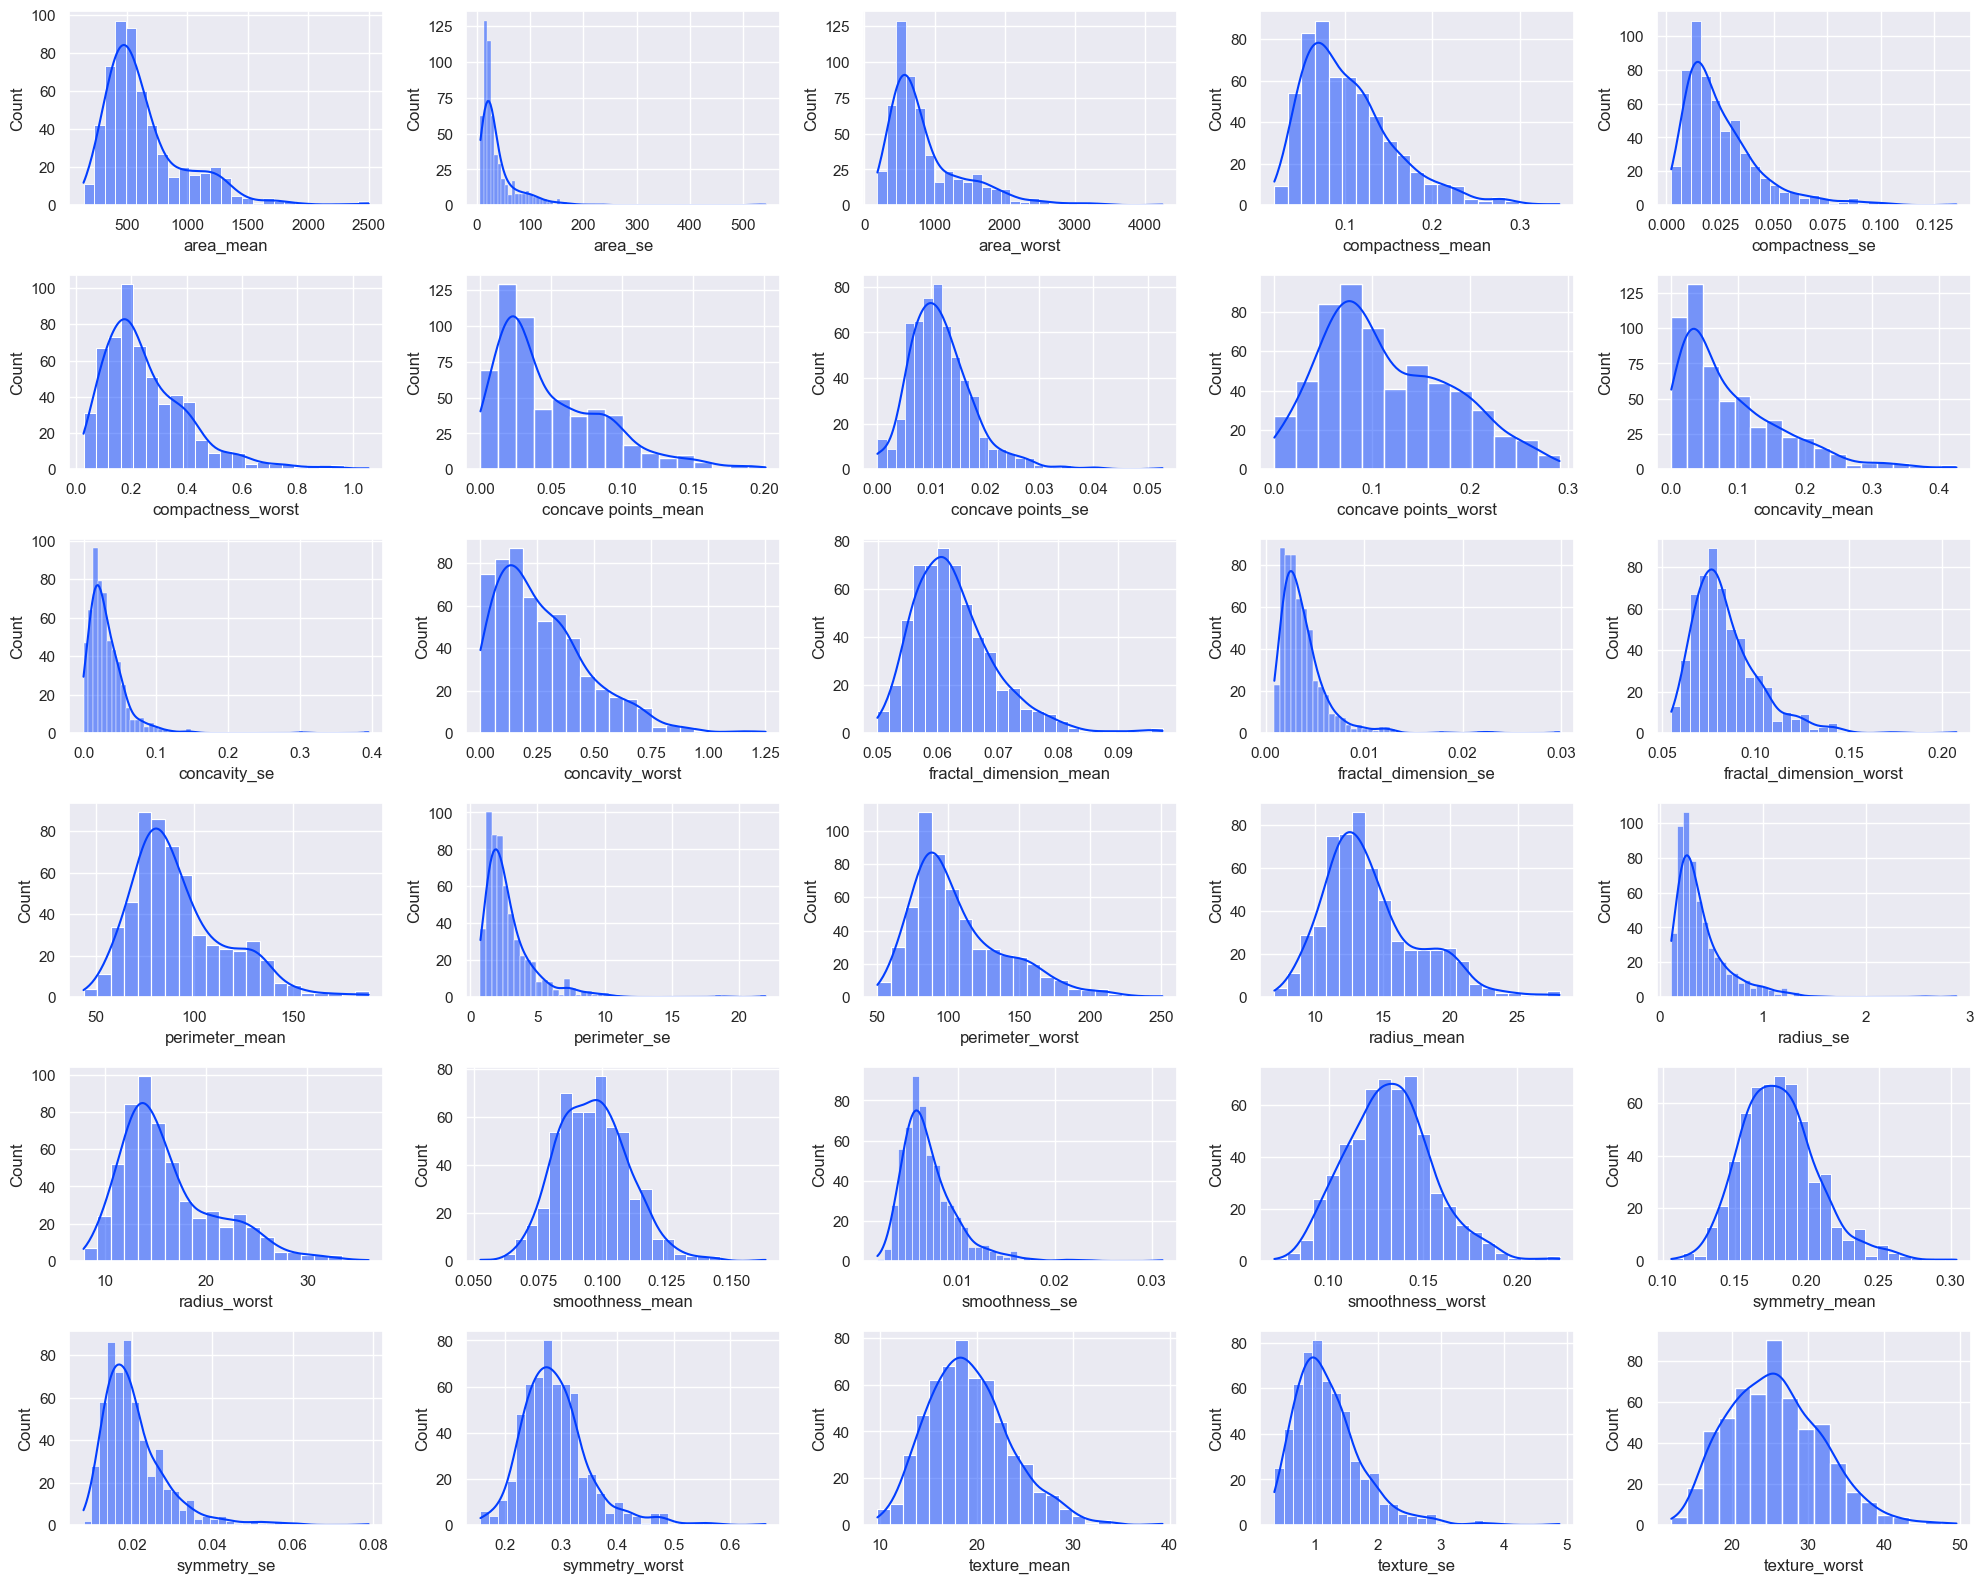

In [13]:
fig, axs = plt.subplots(6, 5, figsize=(20,16))

for ax, coluna in zip(axs.flatten(), df.select_dtypes("number").columns):
    sns.histplot(x=coluna, ax=ax, data=df, kde=True)

plt.tight_layout()
plt.show()

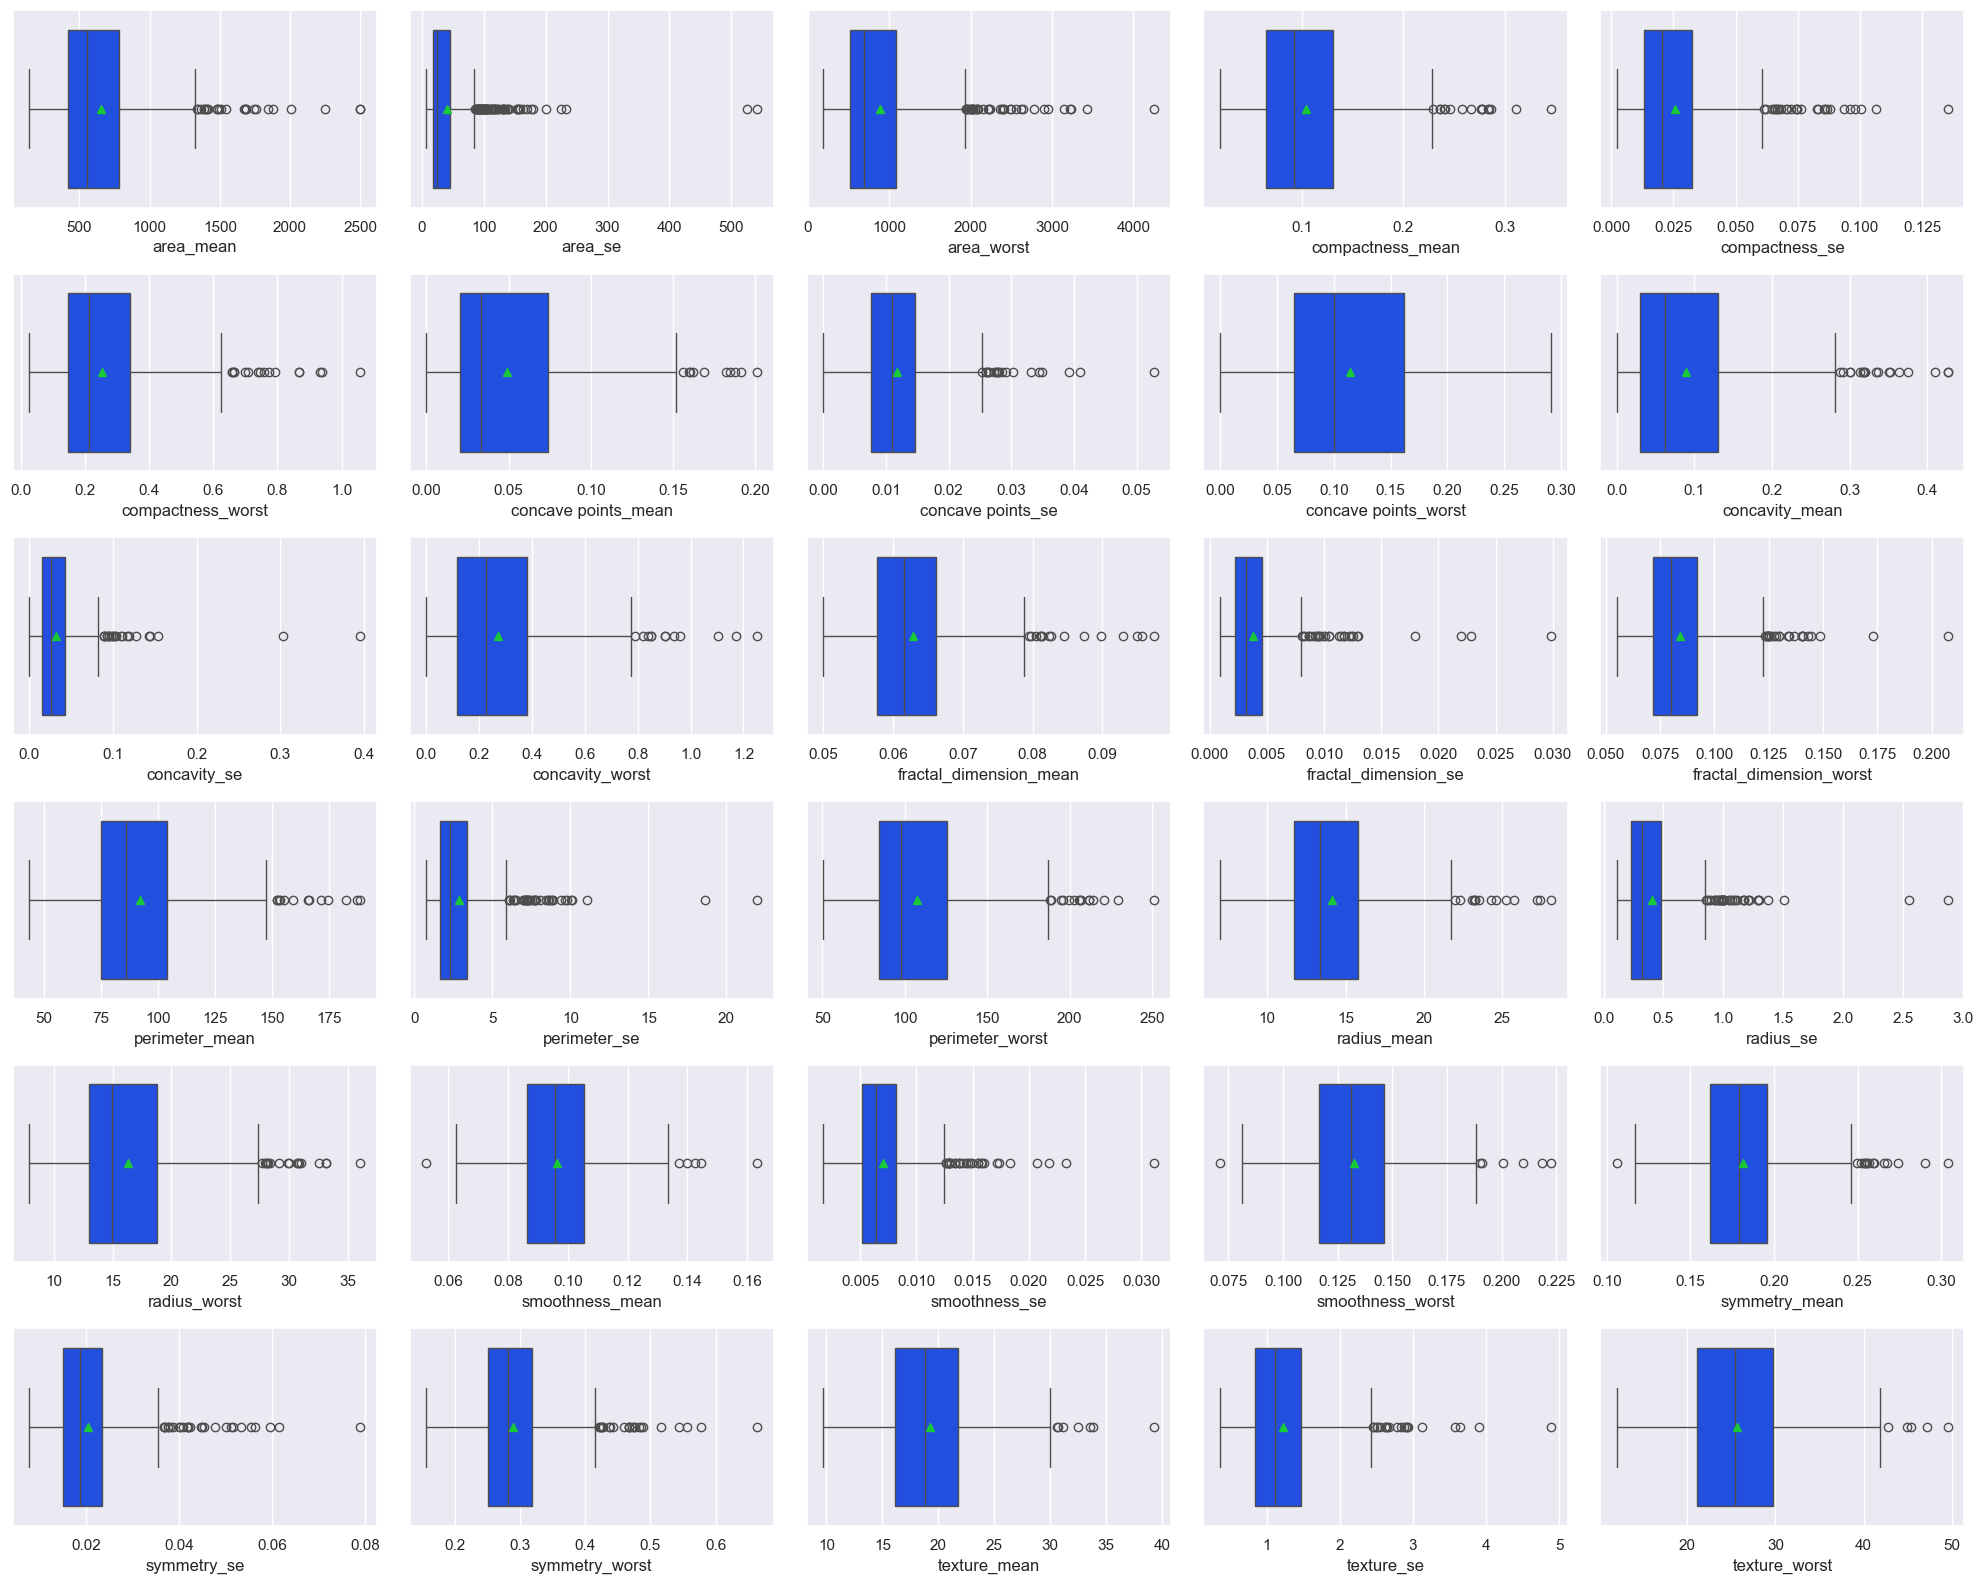

In [14]:
fig, axs = plt.subplots(6, 5, figsize=(20,16))

for ax, coluna in zip(axs.flatten(), df.select_dtypes("number").columns):
    sns.boxplot(x=coluna, ax=ax, data=df, showmeans=True)

plt.tight_layout()
plt.show()

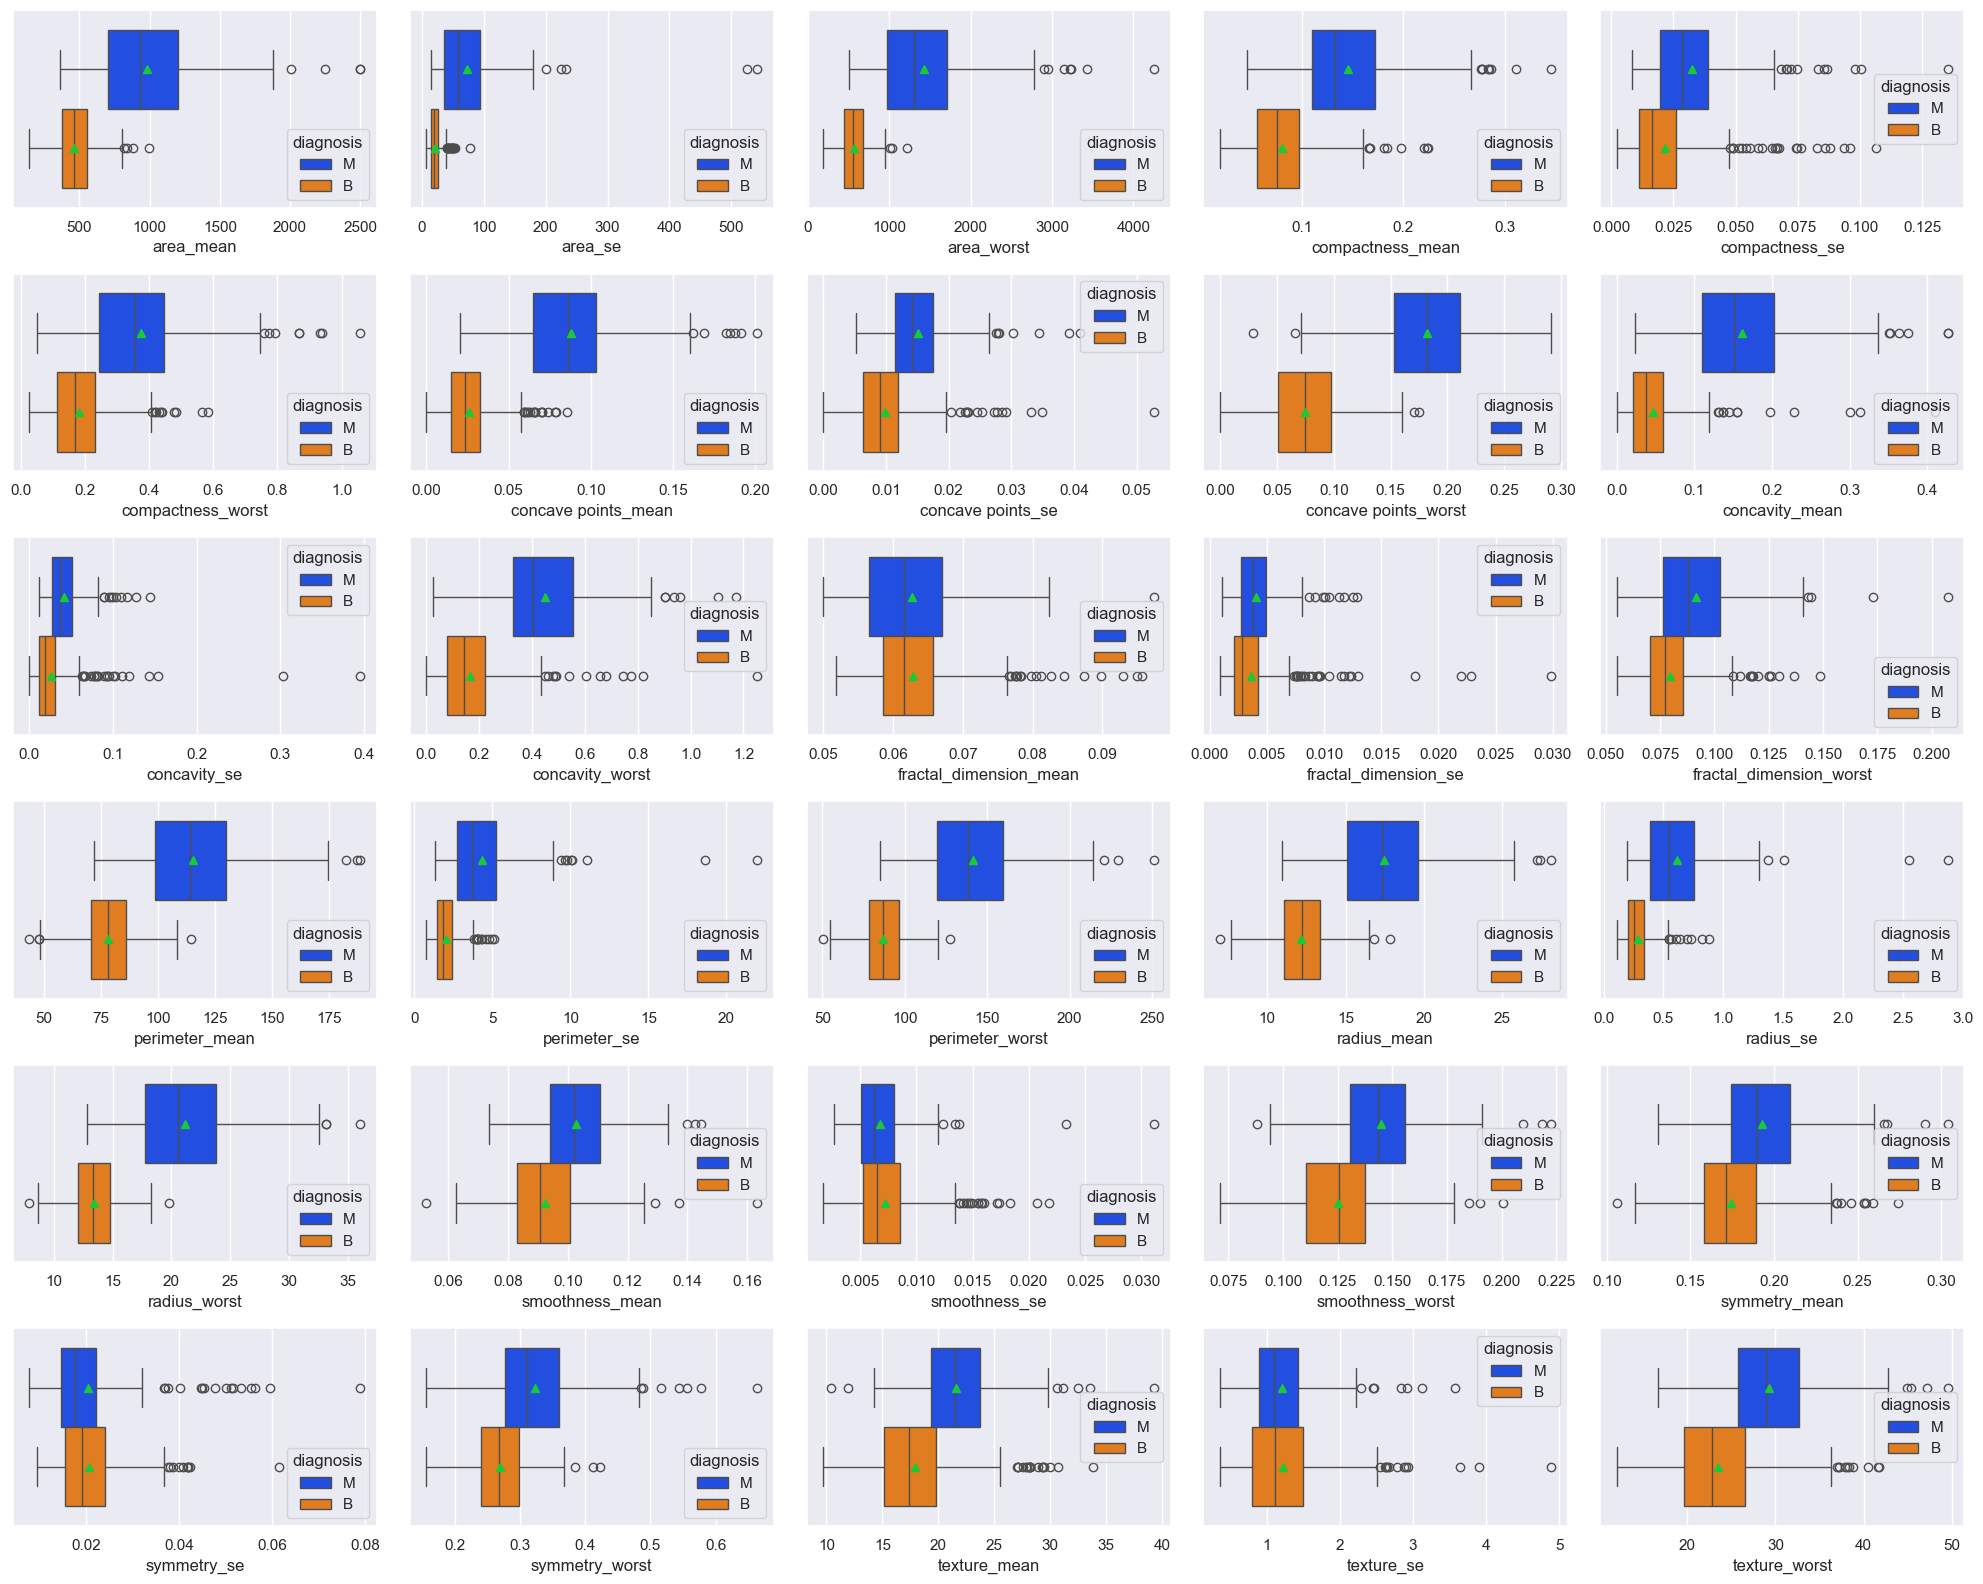

In [15]:
fig, axs = plt.subplots(6, 5, figsize=(20,16))

for ax, coluna in zip(axs.flatten(), df.select_dtypes("number").columns):
    sns.boxplot(x=coluna, ax=ax, data=df, showmeans=True, hue="diagnosis")

plt.tight_layout()
plt.show()

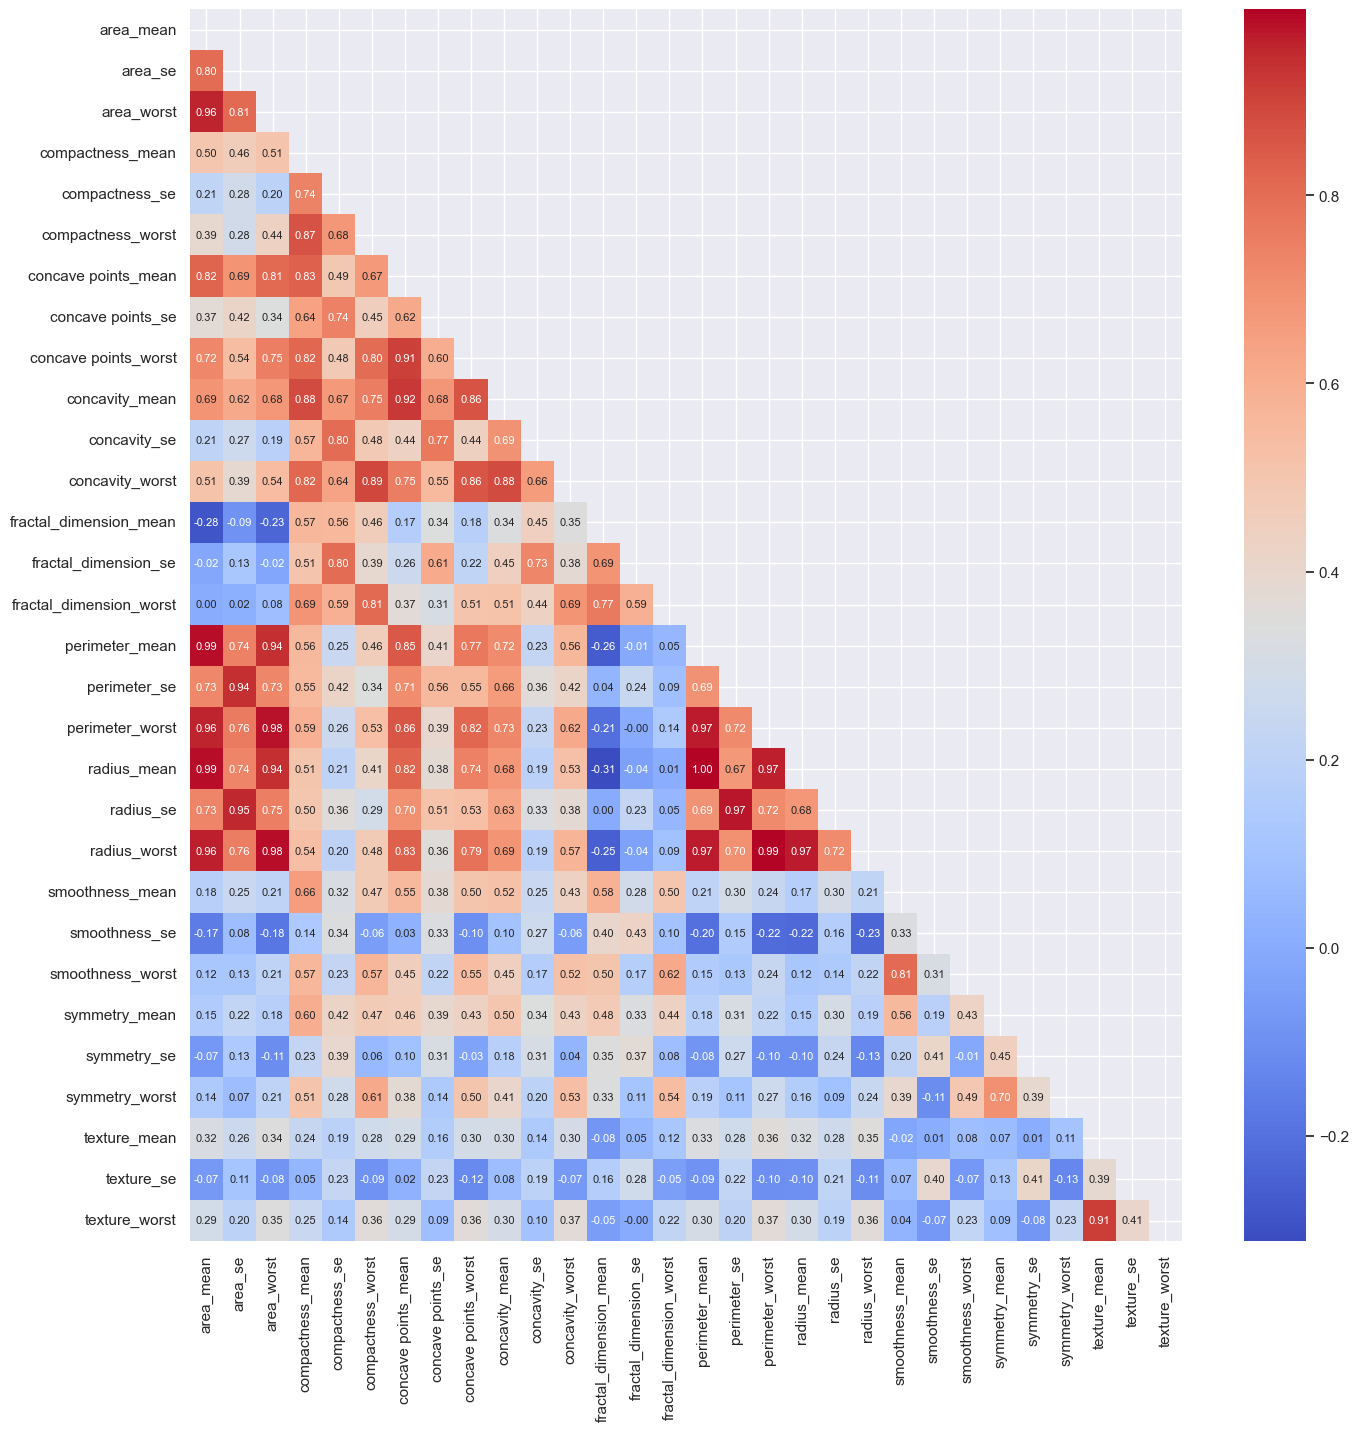

In [16]:
matriz = np.triu(df.select_dtypes("number").corr())

fig, ax = plt.subplots(figsize=(16, 16))

sns.heatmap(
    df.select_dtypes("number").corr(),
    mask=matriz,
    annot=True,
    fmt=".2f",
    ax=ax,
    cmap=PALETTE,
    annot_kws={"fontsize": 8}
)

plt.show()

In [17]:
colunas_numericas = df.select_dtypes("number").columns.to_list()

analise_colunas_ttest = {} # Test T de Student
analise_colunas_mw = {} # Mann-Whitney

coluna_target = "diagnosis"

In [18]:
classes = df[coluna_target].unique()

classes

array(['M', 'B'], dtype=object)

In [19]:
# Variável alpha para obter um nível de significância de 5%

alpha = 0.05

In [20]:
# Pode-se utilizar o "groupby" a fim de filtrar apenas entradas específicas. Por ex:

df.groupby(coluna_target).get_group(classes[1])["area_worst"]

19     711.2
20     630.5
21     314.9
37     545.9
46     242.2
       ...  
558    733.5
559    474.2
560    706.7
561    439.6
568    268.6
Name: area_worst, Length: 357, dtype: float64

In [21]:
agrupamento = df.groupby(coluna_target)

agrupamento

In [22]:
# Aplicando os testes estatísticos à cada coluna e comparando os valores dos pvalue com o alpha a fim de encontrar relações estatísticamente significativas entre as colunas e a coluna target

for coluna in colunas_numericas:
    group1 = agrupamento.get_group(classes[0])[coluna]
    group2 = agrupamento.get_group(classes[1])[coluna]

    estatistica_t, pvalue_t = ttest_ind(group1, group2)

    analise_colunas_ttest[coluna] = {
        "pvalue": pvalue_t,
        "estatistica": estatistica_t,
        "relacao_significativa": pvalue_t < alpha,
    }

    estatistica_mw, pvalue_mw = mannwhitneyu(group1, group2)
    
    analise_colunas_mw[coluna] = {
        "pvalue": pvalue_mw,
        "estatistica": estatistica_mw,
        "relacao_significativa": pvalue_mw < alpha,
    }

In [34]:
# Criando DataFrame à partir dos dicionários resultantes, e transpondo as colunas em linhas para melhor visualização e análise.
# Onde o resultado é 'True', designa que há relação estatísticamente significativa entre as médias da coluna e a coluna target (consegue-se utilizar estas colunas para "enxergar" diferenças entre as classes da coluna target (B e M))

df_analise_colunas_ttest = pd.DataFrame(analise_colunas_ttest).T

df_analise_colunas_ttest

,pvalue,estatistica,relacao_significativa
area_mean,0.0,23.938687,True
area_se,0.0,15.609343,True
area_worst,0.0,25.72159,True
compactness_mean,0.0,17.698392,True
compactness_se,0.0,7.297077,True
compactness_worst,0.0,17.445374,True
concave points_mean,0.0,29.354319,True
concave points_se,0.0,10.642498,True
concave points_worst,0.0,31.054555,True
concavity_mean,0.0,23.103963,True


In [36]:
# Filtrar no DataFrame as colunas onde seja aceita a hipótese nula, ou seja, onde não há diferença estatísticamente significativa entre as médias da coluna com a coluna target.

df_analise_colunas_ttest[
   df_analise_colunas_ttest["relacao_significativa"] == False
]

,pvalue,estatistica,relacao_significativa
fractal_dimension_mean,0.759937,-0.305711,False
fractal_dimension_se,0.063074,1.86233,False
smoothness_se,0.110297,-1.599365,False
symmetry_se,0.876642,-0.155298,False
texture_se,0.843332,-0.197724,False


In [38]:
# Realizando os mesmos passos anteriores para os resultados do teste de Mann Whitney

df_analise_colunas_mw = pd.DataFrame(analise_colunas_mw).T

df_analise_colunas_mw

,pvalue,estatistica,relacao_significativa
area_mean,0.0,71015.5,True
area_se,0.0,70114.5,True
area_worst,0.0,73400.5,True
compactness_mean,0.0,65374.5,True
compactness_se,0.0,55043.5,True
compactness_worst,0.0,65262.5,True
concave points_mean,0.0,72992.5,True
concave points_se,0.0,59926.0,True
concave points_worst,0.0,73164.0,True
concavity_mean,0.0,70978.5,True


In [37]:
df_analise_colunas_mw[
   df_analise_colunas_mw["relacao_significativa"] == False
]

,pvalue,estatistica,relacao_significativa
fractal_dimension_mean,0.537186,36671.5,False
smoothness_se,0.213632,35483.5,False
texture_se,0.643693,38719.5,False


# Etapas de visualização dos resultados:

- ### Comparar os resultados do Teste T e o Mann Whithney a fim de verificar colunas onde, em ambos os testes, não tenha sido verificada diferença estatísticamente significativa entre as medias (presença da coluna em ambos os DataFrames df_analise_colinas_xx);

    ##### Colunas encontradas em ambos os resultados:

          - fractal_dimension_mean

          - smoothness_s

          - texture_se)

    ##### Colunas encontradas apenas nos resultados do ttest:

          - smoothness_se

          - symmetry_se)
  
- ### Comparar o resultado anterior com os boxplots plotados anteriormente;

    #### Discussão dos resultados:

      Os resultados sugerem que as colunas 'smoothness_se' e 'symmetry_se' aparecem somente nos resultados do Test T porque o Mann-Whitney acaba por ser um pouco mais robusto e exigente. Para além disso, verifica-se a presença de uma quantidade considerável de outliers, o que dificulta ainda a aplicação e resultado confiável destes testes. Contudo, ainda se consegue observar uma certa sobreposição das "caixas" dos boxplots, indicando não haver (visualmente) diferenças entre às classes da variável target. Além disso, o Test T presume a distribuição normal. Contudo, segundo algumas referências, isso acaba por ser subjetivo, visto que apartir de um tamanho de amostra, isso não é necessário. Por isso ambos os teste apresentam concordâncias, mesmo que o Mann-Whitney não presuma a homogeneidade das amostras, enquanto o Test T, sim.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area_mean                569 non-null    float64
 1   area_se                  569 non-null    float64
 2   area_worst               569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   compactness_se           569 non-null    float64
 5   compactness_worst        569 non-null    float64
 6   concave points_mean      569 non-null    float64
 7   concave points_se        569 non-null    float64
 8   concave points_worst     569 non-null    float64
 9   concavity_mean           569 non-null    float64
 10  concavity_se             569 non-null    float64
 11  concavity_worst          569 non-null    float64
 12  diagnosis                569 non-null    object 
 13  fractal_dimension_mean   569 non-null    float64
 14  fractal_dimension_se     5

In [40]:
df.to_parquet(DADOS_LIMPOS, index=False)